Did some stuff here that I want to have in my notebooks, but I don't want to actually use. 

I added an averages and a standard deviation row in the main data table, but realized that this is not a good idea. Want to have a separate series because adding rows like this to a table corrupts the data in columns.


[here](https://docs.google.com/spreadsheets/d/14G6CjF6NblTGf6kkQclpXp3XZ3D4Nkw1I92DB4fOjXo/pub?gid=0#) is the data desription online, and the food_kilocalories excel file in this directory contains the same thing. I created a csv file for reading in.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle_funcs as pk

In [53]:
data = pd.read_csv('food_kilocalories.csv')

In [54]:
# Reset the first column name to 'Country'
data.columns = ['Country', '1961', '1962', '1963', '1964', '1965', '1966', '1967',
       '1968', '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007']

In [55]:
# Drop any row which contains a null. Could add more countries by dropping columns to a certain point.
data.dropna(axis=0, inplace=True)

In [56]:
# Change the index to the 'Country' column
data.index = data['Country']
data.drop('Country', axis=1, inplace=True) # And drop the 'Country' column.

# Adding Rows

## Adding an Average Row

In [57]:
# I'm adding average and stdev rows to the table (representing average/stdev of each column (year)). 
# Would probably be better to just create a different series for the stdevs and averages 

# Create dicts to store the calculated values before adding them to the table 
# I think there is a good reason for not doing things like this, because it edits the table 
# to include the values in the column. Therefore, if I add a row for the average of each column, 
# when I call methods on the columns the result is incorrect because it includes the average values. 
# All I want to do is create a plot of the average values. 
# I'm going to figure out how to do this because then I will know how to add rows, practice.

calculated_averages = {}

for col in range(len(data.columns)):
    year = data.columns[col]
    mean_value = data[year].mean()
    calculated_averages[year] = mean_value
    
calculated_stdevs = {}

for col in range(len(data.columns)):
    year = data.columns[col]
    stdev_value = data[year].std()
    calculated_stdevs[year] = stdev_value


In [58]:
# Create two lists, one for years and one for values.
mean_values = []
mean_years = []
for col in range(len(data.columns)):
    mean = (data.iloc[:, col].mean())
    year = (data.columns[col])
    mean_values.append(mean)
    mean_years.append(year)

In [59]:
# Create a Series from the years and values
averages = pd.Series(mean_values, index=mean_years, name='Average')

In [60]:
# Create two lists, one for years and one for values.
stdev_values = []
stdev_years = []
for col in range(len(data.columns)):
    deviation = (data.iloc[:, col].std())
    year = (data.columns[col])
    stdev_values.append(deviation)
    stdev_years.append(year)

In [61]:
# Create a Series from the years and values
stdev = pd.Series(stdev_values, index=stdev_years, name='Stdev')

In [62]:
# Append this series to the DataFrame
data = data.append(averages)
data = data.append(stdev)

In [64]:
# double check averages and stdevs 

for col in range(len(data.columns)):
    year = data.columns[col]
    stored_mean = data[year]['Average']
    test_true = round(stored_mean, 4) == round(calculated_averages[year], 4)
    if not test_true:
        print(year)
        print(stored_mean)
        print(calculated_averages[year])
        print('')

for col in range(len(data.columns)):
    year = data.columns[col]
    stored_stdev = data[year]['Stdev']
    test_true = round(stored_stdev, 4) == round(calculated_stdevs[year], 4)
    if not test_true:
        print(year)
        print(stored_stdev)
        print(calculated_stdevs[year])
        print('')

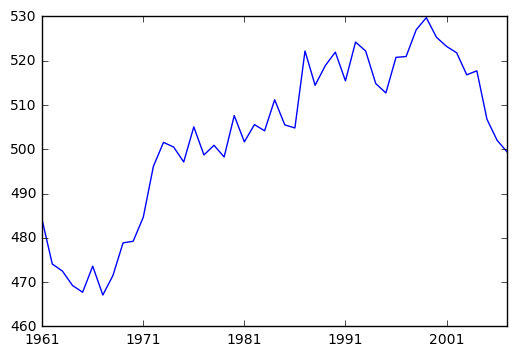

In [65]:
(data.loc['Stdev']).plot()